## Load Data

In [1]:
import numpy as np
import pandas as pd

import os
print(os.listdir("./data"))

df_items = pd.read_csv('./data/items.csv')
df_shops = pd.read_csv('./data/shops.csv')

df_cats = pd.read_csv('./data/item_categories.csv')

df_train = pd.read_csv('./data/sales_train.csv', header=0, sep=',', quotechar='"')
df_smb = pd.read_csv('./data/sample_submission.csv', header=0, sep=',', quotechar='"')
df_test  = pd.read_csv('./data/test.csv', header=0, sep=',', quotechar='"')

['X_test.csv', 'shops.csv', 'X_train.csv', 'sample_submission.csv', 'X_train_all.csv', 'test.csv', 'sales_train_v2.csv', 'y_train_all.csv', 'items.csv', 'X_validation.csv', 'y_train.csv', 'y_validation.csv', 'item_categories.csv', 'sales_train.csv']


In [2]:
df_items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [3]:
df_items.shape

(22170, 3)

In [4]:
df_shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [5]:
df_shops.shape

(60, 2)

In [6]:
df_cats.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
df_cats.shape

(84, 2)

In [8]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [9]:
df_train.shape

(2935849, 6)

In [10]:
df_smb.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [11]:
df_smb.shape

(214200, 2)

In [12]:
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [13]:
df_test.shape

(214200, 3)

Group categories into classes

In [14]:
list_cats = list(df_cats.item_category_name)

In [15]:
list_cats

['PC - Гарнитуры/Наушники',
 'Аксессуары - PS2',
 'Аксессуары - PS3',
 'Аксессуары - PS4',
 'Аксессуары - PSP',
 'Аксессуары - PSVita',
 'Аксессуары - XBOX 360',
 'Аксессуары - XBOX ONE',
 'Билеты (Цифра)',
 'Доставка товара',
 'Игровые консоли - PS2',
 'Игровые консоли - PS3',
 'Игровые консоли - PS4',
 'Игровые консоли - PSP',
 'Игровые консоли - PSVita',
 'Игровые консоли - XBOX 360',
 'Игровые консоли - XBOX ONE',
 'Игровые консоли - Прочие',
 'Игры - PS2',
 'Игры - PS3',
 'Игры - PS4',
 'Игры - PSP',
 'Игры - PSVita',
 'Игры - XBOX 360',
 'Игры - XBOX ONE',
 'Игры - Аксессуары для игр',
 'Игры Android - Цифра',
 'Игры MAC - Цифра',
 'Игры PC - Дополнительные издания',
 'Игры PC - Коллекционные издания',
 'Игры PC - Стандартные издания',
 'Игры PC - Цифра',
 'Карты оплаты (Кино, Музыка, Игры)',
 'Карты оплаты - Live!',
 'Карты оплаты - Live! (Цифра)',
 'Карты оплаты - PSN',
 'Карты оплаты - Windows (Цифра)',
 'Кино - Blu-Ray',
 'Кино - Blu-Ray 3D',
 'Кино - Blu-Ray 4K',
 'Кино - DV

In [16]:
for i in range(1,8):
    list_cats[i] = 'Access'

for i in range(10,18):
    list_cats[i] = 'Consoles'

for i in range(18,25):
    list_cats[i] = 'Consoles Games'

for i in range(26,28):
    list_cats[i] = 'Mobile Games'

for i in range(28,32):
    list_cats[i] = 'CD games'

for i in range(32,37):
    list_cats[i] = 'Card'

for i in range(37,43):
    list_cats[i] = 'Movie'

for i in range(43,55):
    list_cats[i] = 'Books'

for i in range(55,61):
    list_cats[i] = 'Music'

for i in range(61,73):
    list_cats[i] = 'Gifts'

for i in range(73,79):
    list_cats[i] = 'Soft'


df_cats['cats'] = list_cats
df_cats.head()

,item_category_name,item_category_id,cats
0,PC - Гарнитуры/Наушники,0,PC - Гарнитуры/Наушники
1,Аксессуары - PS2,1,Access
2,Аксессуары - PS3,2,Access
3,Аксессуары - PS4,3,Access
4,Аксессуары - PSP,4,Access


In [17]:
df_items = pd.merge(df_items, df_cats, on=['item_category_id'], how='left')

In [18]:
df_items.head()

,item_name,item_id,item_category_id,item_category_name,cats
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,Movie
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,Программы - Для дома и офиса (Цифра),Soft
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,Movie
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,Movie
4,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD,Movie


In [19]:
df_items = df_items[['item_id', 'cats']]
df_items.head()

,item_id,cats
0,0,Movie
1,1,Soft
2,2,Movie
3,3,Movie
4,4,Movie


## EDA

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [22]:
print(df_items['cats'].unique())
print(df_items['cats'].unique().shape)

['Movie' 'Soft' 'Music' 'Consoles Games' 'CD games' 'Books' 'Gifts' 'Card'
 'Игры - Аксессуары для игр' 'Access' 'Mobile Games' 'Consoles'
 'PC - Гарнитуры/Наушники' 'Билеты (Цифра)' 'Служебные - Билеты'
 'Доставка товара' 'Чистые носители (штучные)' 'Чистые носители (шпиль)'
 'Служебные' 'Элементы питания']
(20,)


In [23]:
print(df_train['shop_id'].unique())
print(df_train['shop_id'].unique().shape)

[59 25 24 23 19 22 18 21 28 27 29 26  4  6  2  3  7  0  1 16 15  8 10 14
 13 12 53 31 30 32 35 56 54 47 50 42 43 52 51 41 38 44 37 46 45  5 57 58
 55 17  9 49 39 40 48 34 33 20 11 36]
(60,)


This shows that all the shop ids in the test set appear in the train set.

In [24]:
set(df_test.shop_id.unique()) < set(df_train.shop_id.unique())
print(list(df_train.shop_id.unique()) != list(df_test.shop_id.unique()))
print([shop_id for shop_id in list(df_test.shop_id.unique()) if shop_id not in list(df_train.shop_id.unique())])

True
[]


This shows that not all the shop ids in the test set appear in the train set.

In [25]:
set(df_test.item_id.unique()) < set(df_train.item_id.unique())
#print(list(df_train.item_id.unique()) != list(df_test.item_id.unique()))
#print([item_id for item_id in list(df_test.item_id.unique()) if item_id not in list(df_train.item_id.unique())])

False

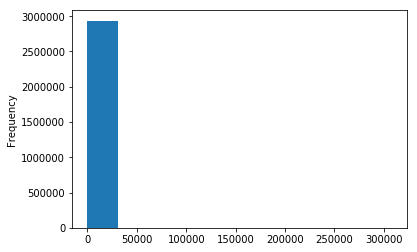

In [26]:
df_train['item_price'].plot.hist(bins=10)

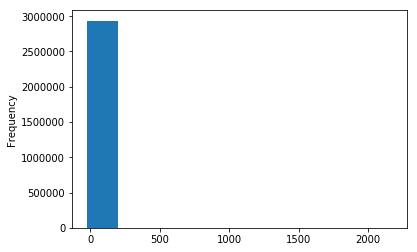

In [27]:
df_train['item_cnt_day'].plot.hist()

## Prepare Data

* Remove outliers

In [28]:
df_train = df_train[df_train['item_price'] < 100000]
df_train = df_train[df_train['item_cnt_day'] < 1000]
df_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935846e+06,2.935846e+06,2.935846e+06,2.935846e+06,2.935846e+06
mean,1.456990e+01,3.300175e+01,1.019722e+04,8.907492e+02,1.241562e+00
std,9.422985e+00,1.622697e+01,6.324297e+03,1.720491e+03,2.217636e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,5.920000e+04,6.690000e+02


* Aggregate training data

In [29]:
from itertools import product

index_cols = ['shop_id', 'item_id', 'date_block_num']

grid = []
for block_num in df_train['date_block_num'].unique():
    cur_shops = df_train.loc[df_train['date_block_num'] == block_num, 'shop_id'].unique()
    cur_items = df_train.loc[df_train['date_block_num'] == block_num, 'item_id'].unique()
    grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))
grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)

df_train = df_train.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day': np.sum, 
                                                                         'item_price': np.mean}).reset_index()

df_train.rename({'item_cnt_day': 'item_cnt_month'}, axis='columns', inplace=True)

df_train = pd.merge(grid, df_train, on=index_cols, how='left')

df_train.describe()

,shop_id,item_id,date_block_num,item_cnt_month,item_price
count,1.091380e+07,1.091380e+07,1.091380e+07,1.609122e+06,1.609122e+06
mean,3.118720e+01,1.130929e+04,1.497336e+01,2.265233e+00,7.906943e+02
std,1.734959e+01,6.209982e+03,9.495635e+00,8.429583e+00,1.532592e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.200000e+01,9.000000e-02
25%,1.600000e+01,5.976000e+03,7.000000e+00,1.000000e+00,1.990000e+02
50%,3.000000e+01,1.139100e+04,1.400000e+01,1.000000e+00,3.990000e+02
75%,4.600000e+01,1.660500e+04,2.300000e+01,2.000000e+00,8.985000e+02
max,5.900000e+01,2.216900e+04,3.300000e+01,1.644000e+03,5.099900e+04


In [30]:
df_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price
0,59,22154,0,1.0,999.0
1,59,2552,0,NaN,NaN
2,59,2554,0,NaN,NaN
3,59,2555,0,NaN,NaN
4,59,2564,0,NaN,NaN


* Add categoryid to each item

In [31]:
df_train = pd.merge(df_train, df_items, on=['item_id'], how='left')

df_test = pd.merge(df_test, df_items, on=['item_id'], how='left')

In [32]:
df_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,cats
0,59,22154,0,1.0,999.0,Movie
1,59,2552,0,NaN,NaN,Music
2,59,2554,0,NaN,NaN,Music
3,59,2555,0,NaN,NaN,Music
4,59,2564,0,NaN,NaN,Music


In [33]:
df_test.head()

,ID,shop_id,item_id,cats
0,0,5,5037,Consoles Games
1,1,5,5320,Music
2,2,5,5233,Consoles Games
3,3,5,5232,Consoles Games
4,4,5,5268,Consoles Games


* Mean encoding

In [34]:
for type_ids in [['item_id'], ['shop_id'], ['cats'], ['item_id', 'shop_id']]:
    for column_id in ['item_price', 'item_cnt_month']:
        df_mean = df_train[type_ids + [column_id]].groupby(type_ids).agg(np.mean).reset_index()
        df_mean.rename(
            {column_id: "mean_of_"+column_id+"_groupby_"+"_".join(type_ids)},
            axis='columns', inplace=True
        )
        
        df_train = pd.merge(df_train, df_mean, on=type_ids, how='left')
        df_test = pd.merge(df_test, df_mean, on=type_ids, how='left')

In [35]:
df_train.columns

Index(['shop_id', 'item_id', 'date_block_num', 'item_cnt_month', 'item_price',
       'cats', 'mean_of_item_price_groupby_item_id',
       'mean_of_item_cnt_month_groupby_item_id',
       'mean_of_item_price_groupby_shop_id',
       'mean_of_item_cnt_month_groupby_shop_id',
       'mean_of_item_price_groupby_cats',
       'mean_of_item_cnt_month_groupby_cats',
       'mean_of_item_price_groupby_item_id_shop_id',
       'mean_of_item_cnt_month_groupby_item_id_shop_id'],
      dtype='object')

In [36]:
df_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,cats,mean_of_item_price_groupby_item_id,mean_of_item_cnt_month_groupby_item_id,mean_of_item_price_groupby_shop_id,mean_of_item_cnt_month_groupby_shop_id,mean_of_item_price_groupby_cats,mean_of_item_cnt_month_groupby_cats,mean_of_item_price_groupby_item_id_shop_id,mean_of_item_cnt_month_groupby_item_id_shop_id
0,59,22154,0,1.0,999.0,Movie,696.576923,1.134615,825.151374,1.952846,340.509868,1.745858,999.0,1.0
1,59,2552,0,NaN,NaN,Music,942.750000,0.625000,825.151374,1.952846,372.622621,1.379644,NaN,NaN
2,59,2554,0,NaN,NaN,Music,1709.050000,1.000000,825.151374,1.952846,372.622621,1.379644,NaN,NaN
3,59,2555,0,NaN,NaN,Music,1124.466038,1.056604,825.151374,1.952846,372.622621,1.379644,NaN,NaN
4,59,2564,0,NaN,NaN,Music,339.073171,1.121951,825.151374,1.952846,372.622621,1.379644,NaN,NaN


In [37]:
df_test.columns

Index(['ID', 'shop_id', 'item_id', 'cats',
       'mean_of_item_price_groupby_item_id',
       'mean_of_item_cnt_month_groupby_item_id',
       'mean_of_item_price_groupby_shop_id',
       'mean_of_item_cnt_month_groupby_shop_id',
       'mean_of_item_price_groupby_cats',
       'mean_of_item_cnt_month_groupby_cats',
       'mean_of_item_price_groupby_item_id_shop_id',
       'mean_of_item_cnt_month_groupby_item_id_shop_id'],
      dtype='object')

In [38]:
df_test.head()

,ID,shop_id,item_id,cats,mean_of_item_price_groupby_item_id,mean_of_item_cnt_month_groupby_item_id,mean_of_item_price_groupby_shop_id,mean_of_item_cnt_month_groupby_shop_id,mean_of_item_price_groupby_cats,mean_of_item_cnt_month_groupby_cats,mean_of_item_price_groupby_item_id_shop_id,mean_of_item_cnt_month_groupby_item_id_shop_id
0,0,5,5037,Consoles Games,1960.580473,2.873303,804.758232,1.773768,1537.789180,2.633343,1693.518519,1.444444
1,1,5,5320,Music,NaN,NaN,804.758232,1.773768,372.622621,1.379644,NaN,NaN
2,2,5,5233,Consoles Games,844.516003,2.668421,804.758232,1.773768,1537.789180,2.633343,859.000000,2.000000
3,3,5,5232,Consoles Games,792.527697,1.855263,804.758232,1.773768,1537.789180,2.633343,599.000000,1.000000
4,4,5,5268,Consoles Games,NaN,NaN,804.758232,1.773768,1537.789180,2.633343,NaN,NaN


* Fill null values

In [39]:
df_test['mean_of_item_price_groupby_item_id'] = df_test['mean_of_item_price_groupby_item_id'].fillna(df_test['mean_of_item_price_groupby_cats'])

df_test['mean_of_item_cnt_month_groupby_item_id'] = df_test['mean_of_item_cnt_month_groupby_item_id'].fillna(df_test['mean_of_item_cnt_month_groupby_cats'])

df_test['mean_of_item_price_groupby_item_id_shop_id'] = df_test['mean_of_item_price_groupby_item_id_shop_id'].fillna(df_test['mean_of_item_price_groupby_item_id'])

df_test['mean_of_item_cnt_month_groupby_item_id_shop_id'] = df_test['mean_of_item_cnt_month_groupby_item_id_shop_id'].fillna(df_test['mean_of_item_cnt_month_groupby_item_id'])

In [40]:
df_train['mean_of_item_price_groupby_item_id_shop_id'] = df_train['mean_of_item_price_groupby_item_id_shop_id'].fillna(df_train['mean_of_item_price_groupby_item_id'])

df_train['mean_of_item_cnt_month_groupby_item_id_shop_id'] = df_train['mean_of_item_cnt_month_groupby_item_id_shop_id'].fillna(df_train['mean_of_item_cnt_month_groupby_item_id'])

In [41]:
for df in df_train, df_test:
    for feat in df.columns[4:]:
        if 'item_cnt' in feat:
            df[feat]=df[feat].fillna(0)
        elif 'item_price' in feat:
            df[feat]=df[feat].fillna(df[feat].median())

In [42]:
df_train['item_cnt_month'] = df_train['item_cnt_month'].fillna(0)

In [43]:
df_train.describe()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,mean_of_item_price_groupby_item_id,mean_of_item_cnt_month_groupby_item_id,mean_of_item_price_groupby_shop_id,mean_of_item_cnt_month_groupby_shop_id,mean_of_item_price_groupby_cats,mean_of_item_cnt_month_groupby_cats,mean_of_item_price_groupby_item_id_shop_id,mean_of_item_cnt_month_groupby_item_id_shop_id
count,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07
mean,3.118720e+01,1.130929e+04,1.497336e+01,3.339840e-01,4.567511e+02,6.827821e+02,1.810334e+00,8.239197e+02,2.173506e+00,6.733016e+02,2.165103e+00,6.810080e+02,1.733548e+00
std,1.734959e+01,6.209982e+03,9.495635e+00,3.334923e+00,6.046454e+02,1.363974e+03,5.518281e+00,1.668937e+02,6.904852e-01,1.093747e+03,2.459068e+00,1.364772e+03,5.861127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.200000e+01,9.000000e-02,4.896430e+00,-2.200000e+00,3.005999e+02,1.279070e+00,3.366439e+01,1.000000e+00,9.000000e-02,-3.500000e+00
25%,1.600000e+01,5.976000e+03,7.000000e+00,0.000000e+00,3.990000e+02,1.942063e+02,1.090909e+00,7.572104e+02,1.809250e+00,3.405099e+02,1.680894e+00,1.959215e+02,1.000000e+00
50%,3.000000e+01,1.139100e+04,1.400000e+01,0.000000e+00,3.990000e+02,3.001633e+02,1.225490e+00,8.251514e+02,2.043924e+00,3.726226e+02,1.745858e+00,2.990000e+02,1.111111e+00
75%,4.600000e+01,1.660500e+04,2.300000e+01,0.000000e+00,3.990000e+02,7.017879e+02,1.585714e+00,8.760895e+02,2.211633e+00,8.596175e+02,2.633343e+00,6.990000e+02,1.467626e+00
max,5.900000e+01,2.216900e+04,3.300000e+01,1.644000e+03,5.099900e+04,5.099900e+04,6.220000e+02,1.438481e+03,9.972344e+00,1.382318e+04,7.895545e+01,5.099900e+04,6.644667e+02


* Add previous months sales

In [44]:
df_train_temp = df_train.copy()
df_train = df_train[df_train['date_block_num']>=12]

print(df_train_temp.shape)
print(df_train.shape)

(10913804, 14)
(6425094, 14)


In [45]:
features = ['item_cnt_month', 'item_price', 'mean_of_item_price_groupby_item_id', 
            'mean_of_item_cnt_month_groupby_item_id', 'mean_of_item_price_groupby_shop_id',
            'mean_of_item_cnt_month_groupby_shop_id', 'mean_of_item_price_groupby_cats',
            'mean_of_item_cnt_month_groupby_cats', 'mean_of_item_price_groupby_item_id_shop_id',
            'mean_of_item_cnt_month_groupby_item_id_shop_id']

In [46]:
def add_historical_data(df, df_train_temp=df_train_temp, features=features, list_diff=[1, 2, 3, 4, 6, 12], 
                        columns=['date_block_num', 'item_id', 'shop_id'] + features):
    for diff in list_diff:
        train_df_copy = df_train_temp.copy()
        train_df_copy['date_block_num'] += diff
        train_df_copy = train_df_copy[columns]
        train_df_copy.rename({
            feat: feat+"_"+str(diff)+'_month_ago' for feat in features
        }, axis=1, inplace=True)
        df = pd.merge(df, train_df_copy, on=['shop_id', 'item_id', 'date_block_num'], how='left')
    return df

In [47]:
df_test['date_block_num'] = 34
df_train = add_historical_data(df_train)
df_test = add_historical_data(df_test)
df_test.drop('date_block_num', axis=1, inplace=True)

In [48]:
df_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,cats,mean_of_item_price_groupby_item_id,mean_of_item_cnt_month_groupby_item_id,mean_of_item_price_groupby_shop_id,mean_of_item_cnt_month_groupby_shop_id,...,item_cnt_month_12_month_ago,item_price_12_month_ago,mean_of_item_price_groupby_item_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_12_month_ago,mean_of_item_price_groupby_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_shop_id_12_month_ago,mean_of_item_price_groupby_cats_12_month_ago,mean_of_item_cnt_month_groupby_cats_12_month_ago,mean_of_item_price_groupby_item_id_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_shop_id_12_month_ago
0,54,10297,12,4.0,749.0,Movie,709.478496,1.210526,655.04886,2.636404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,54,10296,12,3.0,1599.0,Movie,1464.972764,1.130081,655.04886,2.636404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54,10298,12,14.0,399.0,Movie,223.781333,4.821380,655.04886,2.636404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54,10300,12,3.0,699.0,Movie,519.571884,2.520833,655.04886,2.636404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54,10284,12,1.0,299.0,Music,284.902913,1.174757,655.04886,2.636404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_train.columns

Index(['shop_id', 'item_id', 'date_block_num', 'item_cnt_month', 'item_price',
       'cats', 'mean_of_item_price_groupby_item_id',
       'mean_of_item_cnt_month_groupby_item_id',
       'mean_of_item_price_groupby_shop_id',
       'mean_of_item_cnt_month_groupby_shop_id',
       'mean_of_item_price_groupby_cats',
       'mean_of_item_cnt_month_groupby_cats',
       'mean_of_item_price_groupby_item_id_shop_id',
       'mean_of_item_cnt_month_groupby_item_id_shop_id',
       'item_cnt_month_1_month_ago', 'item_price_1_month_ago',
       'mean_of_item_price_groupby_item_id_1_month_ago',
       'mean_of_item_cnt_month_groupby_item_id_1_month_ago',
       'mean_of_item_price_groupby_shop_id_1_month_ago',
       'mean_of_item_cnt_month_groupby_shop_id_1_month_ago',
       'mean_of_item_price_groupby_cats_1_month_ago',
       'mean_of_item_cnt_month_groupby_cats_1_month_ago',
       'mean_of_item_price_groupby_item_id_shop_id_1_month_ago',
       'mean_of_item_cnt_month_groupby_item_id_shop

In [50]:
for df in df_train, df_test:
    for feat in df_train.columns[6:]:
        if 'item_cnt' in feat:
            df[feat]=df[feat].fillna(0)
        elif 'item_price' in feat:
            df[feat]=df[feat].fillna(df[feat].median())

* Add pair-difference features

In [51]:
columns = {
    'diff_between_item_shop_and_item': ('mean_of_item_price_groupby_item_id_shop_id', 'mean_of_item_price_groupby_item_id'),
    'diff_between_item_and_category': ('mean_of_item_price_groupby_item_id', 'mean_of_item_price_groupby_cats')
}

for new_feature, (col1, col2) in columns.items():
    for df in (df_train, df_test):
        df[new_feature] = df[col1] - df[col2]

In [52]:
df_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,cats,mean_of_item_price_groupby_item_id,mean_of_item_cnt_month_groupby_item_id,mean_of_item_price_groupby_shop_id,mean_of_item_cnt_month_groupby_shop_id,...,mean_of_item_price_groupby_item_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_12_month_ago,mean_of_item_price_groupby_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_shop_id_12_month_ago,mean_of_item_price_groupby_cats_12_month_ago,mean_of_item_cnt_month_groupby_cats_12_month_ago,mean_of_item_price_groupby_item_id_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_shop_id_12_month_ago,diff_between_item_shop_and_item,diff_between_item_and_category
0,54,10297,12,4.0,749.0,Movie,709.478496,1.210526,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,39.521504,368.968628
1,54,10296,12,3.0,1599.0,Movie,1464.972764,1.130081,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,62.185807,1124.462896
2,54,10298,12,14.0,399.0,Movie,223.781333,4.821380,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,12.277491,-116.728536
3,54,10300,12,3.0,699.0,Movie,519.571884,2.520833,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,-18.620813,179.062016
4,54,10284,12,1.0,299.0,Music,284.902913,1.174757,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,14.097087,-87.719709


In [53]:
df_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,cats,mean_of_item_price_groupby_item_id,mean_of_item_cnt_month_groupby_item_id,mean_of_item_price_groupby_shop_id,mean_of_item_cnt_month_groupby_shop_id,...,mean_of_item_price_groupby_item_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_12_month_ago,mean_of_item_price_groupby_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_shop_id_12_month_ago,mean_of_item_price_groupby_cats_12_month_ago,mean_of_item_cnt_month_groupby_cats_12_month_ago,mean_of_item_price_groupby_item_id_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_shop_id_12_month_ago,diff_between_item_shop_and_item,diff_between_item_and_category
0,54,10297,12,4.0,749.0,Movie,709.478496,1.210526,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,39.521504,368.968628
1,54,10296,12,3.0,1599.0,Movie,1464.972764,1.130081,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,62.185807,1124.462896
2,54,10298,12,14.0,399.0,Movie,223.781333,4.821380,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,12.277491,-116.728536
3,54,10300,12,3.0,699.0,Movie,519.571884,2.520833,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,-18.620813,179.062016
4,54,10284,12,1.0,299.0,Music,284.902913,1.174757,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,14.097087,-87.719709


In [54]:
df_test.head()

,ID,shop_id,item_id,cats,mean_of_item_price_groupby_item_id,mean_of_item_cnt_month_groupby_item_id,mean_of_item_price_groupby_shop_id,mean_of_item_cnt_month_groupby_shop_id,mean_of_item_price_groupby_cats,mean_of_item_cnt_month_groupby_cats,...,mean_of_item_price_groupby_item_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_12_month_ago,mean_of_item_price_groupby_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_shop_id_12_month_ago,mean_of_item_price_groupby_cats_12_month_ago,mean_of_item_cnt_month_groupby_cats_12_month_ago,mean_of_item_price_groupby_item_id_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_shop_id_12_month_ago,diff_between_item_shop_and_item,diff_between_item_and_category
0,0,5,5037,Consoles Games,1960.580473,2.873303,804.758232,1.773768,1537.789180,2.633343,...,1960.580473,2.873303,804.758232,1.773768,1537.789180,2.633343,1693.518519,1.444444,-267.061955,422.791294
1,1,5,5320,Music,372.622621,1.379644,804.758232,1.773768,372.622621,1.379644,...,399.968818,0.000000,830.860711,0.000000,372.622621,0.000000,399.000000,0.000000,0.000000,0.000000
2,2,5,5233,Consoles Games,844.516003,2.668421,804.758232,1.773768,1537.789180,2.633343,...,399.968818,0.000000,830.860711,0.000000,372.622621,0.000000,399.000000,0.000000,14.483997,-693.273177
3,3,5,5232,Consoles Games,792.527697,1.855263,804.758232,1.773768,1537.789180,2.633343,...,399.968818,0.000000,830.860711,0.000000,372.622621,0.000000,399.000000,0.000000,-193.527697,-745.261482
4,4,5,5268,Consoles Games,1537.789180,2.633343,804.758232,1.773768,1537.789180,2.633343,...,399.968818,0.000000,830.860711,0.000000,372.622621,0.000000,399.000000,0.000000,0.000000,0.000000


* Clip values of the target

In [55]:
print(df_train['item_cnt_month'].unique())
print(df_train['item_cnt_month'].min())
print(df_train['item_cnt_month'].max())

[ 4.000e+00  3.000e+00  1.400e+01  1.000e+00  9.000e+00  2.000e+00
  8.300e+01  5.000e+00  8.000e+00  6.000e+00  1.200e+01  5.800e+01
  2.400e+01  2.000e+01  1.000e+01  1.100e+01  7.000e+00  1.900e+01
  2.100e+01  1.300e+01  2.700e+01  0.000e+00  2.300e+01  1.500e+01
  1.600e+01  2.900e+01  2.800e+01 -1.000e+00  1.800e+01  3.100e+01
  2.200e+01  1.700e+01  3.300e+01  6.910e+02  4.300e+01  3.200e+01
  7.400e+01  1.230e+02  3.400e+01  3.500e+01  2.500e+01  5.200e+01
  6.900e+01  1.530e+02  3.600e+01  3.700e+01  1.310e+02  3.490e+02
  5.300e+01  8.000e+01  4.200e+01  2.600e+01  1.950e+02  1.610e+02
  8.200e+01  5.000e+01  4.800e+01  4.400e+01  8.990e+02  4.100e+01
  3.000e+01  4.000e+01  6.300e+01  1.140e+02  8.600e+01  4.700e+01
  5.520e+02  3.800e+01  5.500e+01  5.570e+02  1.990e+02  9.900e+01
  9.100e+01  3.840e+02  4.500e+01  1.290e+02  3.900e+01  1.020e+02
  6.100e+01 -2.000e+00  4.600e+01  5.700e+01  7.000e+01  6.000e+01
  7.600e+01  1.100e+02  5.100e+01  1.450e+02  9.500e+01  1.080

In [56]:
df_train['item_cnt_month'].value_counts

<bound method IndexOpsMixin.value_counts of 0           4.0
1           3.0
2          14.0
3           3.0
4           1.0
5           9.0
6           2.0
7           1.0
8           1.0
9           1.0
10          1.0
11          1.0
12          1.0
13          1.0
14          1.0
15          1.0
16         83.0
17          3.0
18          2.0
19          3.0
20          4.0
21          1.0
22          1.0
23          1.0
24          2.0
25          1.0
26          2.0
27          1.0
28          1.0
29          1.0
           ... 
6425064     0.0
6425065     0.0
6425066     0.0
6425067     0.0
6425068     0.0
6425069     0.0
6425070     0.0
6425071     0.0
6425072     0.0
6425073     0.0
6425074     0.0
6425075     0.0
6425076     0.0
6425077     0.0
6425078     0.0
6425079     0.0
6425080     0.0
6425081     0.0
6425082     0.0
6425083     0.0
6425084     0.0
6425085     0.0
6425086     0.0
6425087     0.0
6425088     0.0
6425089     0.0
6425090     0.0
6425091     0.0
6425092     

In [57]:
df_train['item_cnt_month'] = df_train['item_cnt_month'].clip(0, 20)

* Split the data in to train and validation sets

In [58]:
train_set = df_train[df_train['date_block_num']<33]
validation_set = df_train[df_train['date_block_num']==33].reset_index()

In [59]:
validation_set.head()

,index,shop_id,item_id,date_block_num,item_cnt_month,item_price,cats,mean_of_item_price_groupby_item_id,mean_of_item_cnt_month_groupby_item_id,mean_of_item_price_groupby_shop_id,...,mean_of_item_price_groupby_item_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_12_month_ago,mean_of_item_price_groupby_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_shop_id_12_month_ago,mean_of_item_price_groupby_cats_12_month_ago,mean_of_item_cnt_month_groupby_cats_12_month_ago,mean_of_item_price_groupby_item_id_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_shop_id_12_month_ago,diff_between_item_shop_and_item,diff_between_item_and_category
0,6186922,45,13315,33,1.0,649.0,Books,640.875000,1.125000,861.189864,...,296.188435,0.000000,825.151374,0.00000,372.622621,0.000000,299.000000,0.000000,8.125000,290.090958
1,6186923,45,13880,33,1.0,229.0,Music,208.925643,2.561828,861.189864,...,208.925643,2.561828,861.189864,1.80925,372.622621,1.379644,214.000000,1.800000,5.074357,-163.696979
2,6186924,45,13881,33,2.0,659.0,Music,579.715439,2.710271,861.189864,...,579.715439,2.710271,861.189864,1.80925,372.622621,1.379644,588.300000,1.960000,8.584561,207.092817
3,6186925,45,13923,33,1.0,169.0,Movie,150.236386,1.572183,861.189864,...,150.236386,1.572183,861.189864,1.80925,340.509868,1.745858,157.571429,1.142857,7.335042,-190.273482
4,6186926,45,14227,33,1.0,99.0,CD games,97.129878,3.462963,861.189864,...,97.129878,3.462963,861.189864,1.80925,520.312473,3.636535,99.000000,1.750000,1.870122,-423.182595


* Save the datasets

In [ ]:
features = df_train.columns[6:].tolist()

df_train[features].to_csv('./data/X_train_all.csv', index=False)
df_train['item_cnt_month'].to_csv('./data/y_train_all.csv', index=False)

X_train = train_set[features]
X_train.to_csv('./data/X_train.csv', index=False)

y_train = train_set['item_cnt_month']
y_train.to_csv('./data/y_train.csv', index=False)

X_validation = validation_set[features]
X_validation.to_csv('./data/X_validation.csv', index=False)

y_validation = validation_set['item_cnt_month']
y_validation.to_csv('./data/y_validation.csv', index=False)

df_test = df_test[['ID'] + features]
df_test.to_csv('./data/X_test.csv', index=False)

## Modeling

* xgboost

In [ ]:
import pandas as pd

X_train = pd.read_csv('./data/X_train.csv')
print(X_train.columns)
print(X_train.shape)

y_train = pd.read_csv('./data/y_train.csv', header=None)
print(y_train.shape)


X_validation = pd.read_csv('./data/X_validation.csv')
y_validation = pd.read_csv('./data/y_validation.csv', header=None)

In [ ]:
import xgboost as xgb

params = {
        'eta': 0.08, 
        'max_depth': 7,
        'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'seed': 3,
        'gamma':1,
        'silent': True
    }

watchlist = [
    (xgb.DMatrix(X_train, y_train), 'train'),
    (xgb.DMatrix(X_validation, y_validation), 'validation')
]

model = xgb.train(params, xgb.DMatrix(X_train, y_train), 500,  watchlist, maximize=False, 
                  verbose_eval=5, early_stopping_rounds=50)

In [ ]:
pred = model.predict(xgb.DMatrix(X_test), ntree_limit=model.best_ntree_limit)

df_test = pd.read_csv('./data/X_test.csv')

X_test = df_test.columns[1:]

df_test['item_cnt_month'] = pred.clip(0, 40)
df_test[['ID', 'item_cnt_month']].to_csv('xgboost_submission.csv', index=False)

* lightGBM

In [ ]:
import pandas as pd

X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')

X_validation = pd.read_csv('./data/X_validation.csv')
y_validation = pd.read_csv('./data/y_validation.csv')

In [ ]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_validation, y_validation, reference=lgb_train)

# https://github.com/Microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Start training...')

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=500,
                valid_sets=lgb_eval,
                early_stopping_rounds=50)

# print('Save model...')
# save model to file
# gbm.save_model('lightgbm_model.txt')

In [ ]:
pred = gbm.predict(X_test, ntree_limit=model.best_ntree_limit)

df_test = pd.read_csv('./data/X_test.csv')

X_test = df_test.columns[1:]

df_test['item_cnt_month'] = pred.clip(0, 40)
df_test[['ID', 'item_cnt_month']].to_csv('xgboost_submission.csv', index=False)